In [77]:
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import cross_validation
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re, math, collections, itertools
import nltk, nltk.classify.util, nltk.metrics
from nltk import *
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.corpus import stopwords

In [78]:
movie_reviews_data_folder = 'C:/Users/satish/Desktop/WORKING/sklearn_tutorial/doc/data/movie_reviews/txt_sentoken'

In [79]:
    # the training data folder must be passed as first argument    
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [80]:
def apply_stopwords():
    cachedStopWords = set(stopwords.words("english"))
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    for f in dataset.filenames:
        #rev_content = open(f).read()
        with open(f) as k:
            rev = k.readlines()
        rev = [i.replace("\n","") for i in rev]
        rem_sw=[]
        for sent in rev:
            rs = sent.split(" ")
            r_s = [word for word in rs if word not in cachedStopWords] 
            rem_sw.append(" ".join(r_s))       
        rev_content = " ".join(rem_sw)
        if f.split("\\")[2].startswith('cv8') or f.split("\\")[2].startswith('cv9'):
            test_data.append(rev_content)
            test_labels.append(f.split("\\")[1])
        else:
            train_data.append(rev_content)
            train_labels.append(f.split("\\")[1])
    print len(test_data)
    print len(test_labels)
    print len(train_data)
    print len(train_labels)
    return test_data,test_labels,train_data,train_labels
#test_data,test_labels,train_data,train_labels = apply_stopwords()


In [81]:
# Read the data
def no_stopwords():
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    for f in dataset.filenames:
        rev_content = open(f).read()
        if f.split("\\")[2].startswith('cv8') or f.split("\\")[2].startswith('cv9'):
            test_data.append(rev_content)
            test_labels.append(f.split("\\")[1])
        else:
            train_data.append(rev_content)
            train_labels.append(f.split("\\")[1])
    print len(test_data)
    print len(test_labels)
    print len(train_data)
    print len(train_labels)
    return test_data,test_labels,train_data,train_labels
#test_data,test_labels,train_data,train_labels = no_stopwords()    


In [111]:
def create_vectr(test_data,train_data):
    import time
    # Create feature vectors
    vectr = TfidfVectorizer(min_df=10,
                                 max_df = 0.8,
                                 sublinear_tf=True,
                                 use_idf=True)
    train_vectors = vectr.fit_transform(train_data)
    test_vectors = vectr.transform(test_data)
    print test_vectors.shape
    print train_vectors.shape
    return train_vectors,test_vectors

In [112]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(dataset.target_names))
    plt.xticks(tick_marks, dataset.target_names, rotation=45)
    plt.yticks(tick_marks, dataset.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [113]:
from sklearn.metrics import confusion_matrix

In [120]:
def knn_performance(train_vectors,test_vectors,test_data,test_labels,train_data,train_labels):
    #Performance of KNN Classifier
    #Calculate Error rate and accuracy rate for different K value.
    from sklearn.neighbors import KNeighborsClassifier
    result = {}
    for i in range(2,13):
        print i
        knn = KNeighborsClassifier(n_neighbors = i)
        start_time = time.time()
        knn.fit(train_vectors, train_labels) 
        end_time = time.time()
        knn_predict = knn.predict(test_vectors)
        p_time = time.time()
        time_knn_train = end_time-start_time
        time_knn_predict = p_time-end_time
    
        # Print results in a nice table
        print("Results for KNN ")
        print(np.mean(knn_predict == test_labels))
        print("Training time: %fs; Prediction time: %fs" % (time_knn_train, time_knn_predict))
        print(classification_report(test_labels, knn_predict))
        cm = confusion_matrix(test_labels, knn_predict)
        #Accuracy and Error Rate:
        TP = cm[1][1]
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        Accuracy = float(TP+TN) / float(TP + FP + TN + FN)
        Error_rate = float(FP+FN) / float(TP + FP + TN + FN)
        print ("Accuracy : %fs"%(Accuracy))
        print ("Error_rate : %fs"%(Error_rate))
        result[i] = (Accuracy,Error_rate)
    print result
    return result

In [121]:
print "KNN performance RAW data"
test_data,test_labels,train_data,train_labels = no_stopwords()
train_vectors,test_vectors = create_vectr(test_data,train_data)
raw_result = knn_performance(train_vectors,test_vectors,test_data,test_labels,train_data,train_labels)

KNN performance RAW data
400
400
1600
1600
(400, 7016)
(1600, 7016)
2
Results for KNN 
0.71
Training time: 0.000000s; Prediction time: 0.165000s
             precision    recall  f1-score   support

        neg       0.67      0.83      0.74       200
        pos       0.78      0.59      0.67       200

avg / total       0.72      0.71      0.71       400

Accuracy : 0.710000s
Error_rate : 0.290000s
3
Results for KNN 
0.6875
Training time: 0.000000s; Prediction time: 0.152000s
             precision    recall  f1-score   support

        neg       0.70      0.65      0.68       200
        pos       0.67      0.72      0.70       200

avg / total       0.69      0.69      0.69       400

Accuracy : 0.687500s
Error_rate : 0.312500s
4
Results for KNN 
0.7175
Training time: 0.000000s; Prediction time: 0.165000s
             precision    recall  f1-score   support

        neg       0.69      0.79      0.74       200
        pos       0.75      0.65      0.70       200

avg / total       

In [122]:
print "KNN performance PREPROCESSED data"
test_data,test_labels,train_data,train_labels = apply_stopwords()
train_vectors,test_vectors = create_vectr(test_data,train_data)
processed_result = knn_performance(train_vectors,test_vectors,test_data,test_labels,train_data,train_labels)

KNN performance PREPROCESSED data
400
400
1600
1600
(400, 6974)
(1600, 6974)
2
Results for KNN 
0.715
Training time: 0.000000s; Prediction time: 0.106000s
             precision    recall  f1-score   support

        neg       0.68      0.82      0.74       200
        pos       0.77      0.61      0.68       200

avg / total       0.72      0.71      0.71       400

Accuracy : 0.715000s
Error_rate : 0.285000s
3
Results for KNN 
0.6675
Training time: 0.015000s; Prediction time: 0.108000s
             precision    recall  f1-score   support

        neg       0.69      0.61      0.65       200
        pos       0.65      0.72      0.69       200

avg / total       0.67      0.67      0.67       400

Accuracy : 0.667500s
Error_rate : 0.332500s
4
Results for KNN 
0.685
Training time: 0.015000s; Prediction time: 0.113000s
             precision    recall  f1-score   support

        neg       0.66      0.76      0.71       200
        pos       0.72      0.61      0.66       200

avg / tot

In [126]:
import pandas as pd
from IPython.display import display, HTML
raw_dataset = pd.DataFrame()
raw_dataset["k"] = [2,3,4,5,6,7,8,9,10,11,12]
raw_dataset["Acc"] = [raw_result[k][0] for k in raw_result.keys()]
raw_dataset["Err"] = [raw_result[k][1] for k in raw_result.keys()]
display(raw_dataset)

,k,Acc,Err
0,2,0.7100,0.2900
1,3,0.6875,0.3125
2,4,0.7175,0.2825
3,5,0.7325,0.2675
4,6,0.7400,0.2600
5,7,0.7275,0.2725
6,8,0.7350,0.2650
7,9,0.7325,0.2675
8,10,0.7525,0.2475
9,11,0.7400,0.2600


In [127]:
import pandas as pd
from IPython.display import display, HTML
processed_dataset = pd.DataFrame()
processed_dataset["k"] = [2,3,4,5,6,7,8,9,10,11,12]
processed_dataset["Acc"] = [processed_result[k][0] for k in processed_result.keys()]
processed_dataset["Err"] = [processed_result[k][1] for k in processed_result.keys()]
display(processed_dataset)

,k,Acc,Err
0,2,0.7150,0.2850
1,3,0.6675,0.3325
2,4,0.6850,0.3150
3,5,0.6900,0.3100
4,6,0.7125,0.2875
5,7,0.7250,0.2750
6,8,0.7300,0.2700
7,9,0.7350,0.2650
8,10,0.7300,0.2700
9,11,0.7275,0.2725


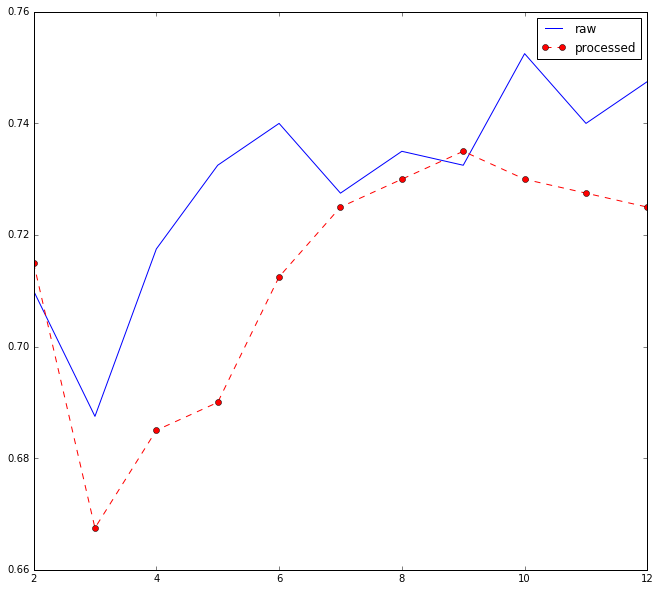

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11 #w
fig_size[1] = 10#H
plt.rcParams["figure.figsize"] = fig_size
#raw_dataset.plot(kind="hist",title="Raw stats")
plt.plot(raw_dataset["k"], raw_dataset["Acc"], label='raw')
plt.plot(processed_dataset["k"], processed_dataset["Acc"], marker='o', linestyle='--', color='r', label='processed')
plt.legend()
plt.show()
#plt.plot(processed_dataset["k"], processed_dataset["Acc"],kind="hist")

In [ ]:
Here we are trying to see the performance variance in the accuracy of the KNN classifier by changing the k values form 2 through 10, 
for the given list of movie reviews between the original reviewes versus the preprocessed reviews.

The performance after preprocessing the text is almost equal or little lower than using original data.  
we noticed the original data leads lot of variance (inconsistent) with lots of noise in the test and 
looks like the original data contains lot of missing values and the missing values represented by 0 are treated as a significant 
feature by the classifier.
however the results from processed data seems more consistent. 
It means suitable data preprocessing method would lead to consistent increases in accuracy.
To improve the overall accuracy, we have to improve the performance of the classifier by a good feature selection method. 